<p style="text-align:right;">Daniel Böckenhoff, Max-Planck-Institute for Plasmaphysics</p>

## Convolutional Neural Networks to recognise numbers with the MNIST database
After we have experienced with fully connected NNs that it is hard to get accuracies of 99% and above, we investigate the power of convolutional neural networks. Finally we will investigate the robustnes of our dataset.

**What you will learn:**
 - Further classification error analysis
 - inspect failure cases and understand how to approach to make a NN more robust
 
**Task:**
Carefully read the cells and execute them (Shift enter or menu panel). Complete the exercises marked as such.
  
**Note:**
You can skip until model definition ("Define and train a convolutional neural network") if you have done the mnist_dense exercise.

## Image Data Preparation
We will load the mnist data set with the *keras.datasets* backend.

In [1]:
import pathlib
import tensorflow as tf
import numpy as np
import sklearn.metrics
import matplotlib.pyplot as plt
import os
import datetime

2024-10-29 13:31:54.783983: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-29 13:31:54.789633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-29 13:31:54.796365: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-29 13:31:54.798298: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-29 13:31:54.803832: I tensorflow/core/platform/cpu_feature_guar

In [2]:
# Set the path to the directory where we have already downloaded the data
data_path = (pathlib.Path(".") / "..").resolve() / 'data' / 'mnist.npz'  # if no path were given, keras would download the dataset

# Load the data
data = np.load(data_path)
x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
class_names = list(set(y_train))
num_classes = len(class_names)  # 10
num_imgs = len(y_train) + len(y_test)

print("Number of samples in whole data set: {num_imgs}".format(**locals()))

Number of samples in whole data set: 70000


## Make TensorFlow Datasets


**Note:** Training, Validation and Test Split
A rule of thum is to split the data set in taining, validation and test set by the ratio 80:10:10.
A specialty in the mnist dataset is the predefined test set which serves the purpose of exact comparability between different research groups.

In [3]:
img_size = x_train.shape[1]  # width and height of all images

# Convert target classes to categorical ones
y_train_labels = y_train
y_test_labels = y_test
y_train = tf.keras.utils.to_categorical(y_train_labels, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

## Define and Train a Convolutional Neural Network
**Layer types:**
 - [Conv2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv2D) convolutional layer, here inputs are 3dim and the convolution sums over the 3rd dim.
 - [MaxPooling2D](https://www.tensorflow.org/api_docs/python/tf/keras/layers/MaxPooling2D) takes local maxima over a rectangular region.
 - [Dropout](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout) randomly deactivates neurons during training, which can make training more robust.
 - [BatchNormalization](https://arxiv.org/pdf/1502.03167.pdf), centralizes and scales its input to have approximately 0 mean and variance 1.

**Exercise:**

1. Implement a NN architecture similar to that in [this paper](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf). You do not need to read the full paper. Look at figure 2 and use that as inspiration. For more detail you may read Section II.B *LeNet-5*. In case you do not have access to that paper, you find it under *literature/lecun-01a.pdf* in this git repository.

**Links:**
* [tf.keras.layers.Reshape](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Reshape)

In [4]:
np.random.seed(1)  # so we all get the same pseudorandom results

model = tf.keras.models.Sequential(name="mnist_cnn_student")  # sequential stack of layers

model.add(tf.keras.layers.Input((img_size, img_size)))
model.add(tf.keras.layers.BatchNormalization())

############################################################
# Your modifications to the model here
############################################################

model.add(tf.keras.layers.Dense (num_classes, activation = "softmax"))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# pretty print a summary of the layer types and dimensions
model.summary()

I0000 00:00:1730205116.163575   64357 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205116.205166   64357 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205116.205212   64357 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205116.210791   64357 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1730205116.210827   64357 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:0

Model: "mnist_cnn_student"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 28, 28)         │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28, 10)         │           290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 402 (1.57 KB)

 Trainable params: 346 (1.35 KB)

 Non-trainable params: 56 (224.00 B)

In [5]:
# Suggestion/Solution for last task
# 4 points for correct implementation
np.random.seed(1)  # so we all get the same pseudorandom results

model = tf.keras.models.Sequential(name="mnist_cnn_solution")  # sequential stack of layers

model.add(tf.keras.layers.Input((img_size, img_size)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Reshape((img_size, img_size, 1)))

model.add(tf.keras.layers.Conv2D(6, kernel_size=(3, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
# actiavtion and pooling is commutable. We put the Conv2D activation here to reduce computational effort
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))

model.add(tf.keras.layers.Conv2D(16, kernel_size=(3, 3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))

model.add(tf.keras.layers.Conv2D(120, kernel_size=(5, 5)))
model.add(tf.keras.layers.Activation(tf.keras.activations.relu))

model.add(tf.keras.layers.Reshape((120,)))

model.add(tf.keras.layers.Dense(80, activation="relu"))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense (num_classes, activation = "softmax"))

# Configure the model and start training
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# pretty print a summary of the layer types and dimensions
model.summary()

Model: "mnist_cnn_solution"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_1           │ (None, 28, 28)         │           112 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 13, 13, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 16)     │           880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 5, 5, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 1, 1, 120)      │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 1, 1, 120)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 80)             │         9,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 80)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 59,662 (233.05 KB)

 Trainable params: 59,606 (232.84 KB)

 Non-trainable params: 56 (224.00 B)

In [6]:
log_basedir = os.path.join("logs", "mnist_cnn/")

def train(model, x_train, y_train, epochs=20, batch_size=250, log_basedir=log_basedir):
    # Callbacks: What should be done during (long) training?

    # Function to store model to file, if validation loss has a new record
    # Check always after having seen at least another save_freq examples.
    checkpoint = tf.keras.callbacks.ModelCheckpoint(
        model.name + '.keras',
        save_weights_only=False,  # save the entire model, not only the weights. This allows re-building the whole model
        monitor='val_loss',
        mode='min',
        save_best_only=True,
        verbose=1)

    # Function to decrease learning rate by 'factor'
    # when there has been no significant improvement in the last 'patience' epochs.
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss', mode='min', factor=0.75, patience=3, verbose=1)

    # Use tensorboard to show the progress. See cell below for instructions on how to use tensorboard
    log_dir = log_basedir + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + "-" + model.name

    tensorboard_callback = tf.keras.callbacks.TensorBoard(
        log_dir,
        histogram_freq=1,  # frequency (in epochs) at which to compute activation and weight histograms for the layers
        write_images=False,  # whether to write model weights to visualize as image in TensorBoard.
    )
                         
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[checkpoint, reduce_lr, tensorboard_callback]
                       )
    return history

In [7]:
# Let us initiate the training process
history = train(model, x_train, y_train, epochs=100)

Epoch 1/100


I0000 00:00:1730205117.836489   64425 service.cc:146] XLA service 0x7fd33c00c550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730205117.836566   64425 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-10-29 13:31:57.854350: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-29 13:31:57.936887: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 90300
2024-10-29 13:31:59.288973: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_981', 4 bytes spill stores, 4 bytes spill loads

2024-10-29 13:31:59.477609: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function

 37/216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3775 - loss: 1.9043

I0000 00:00:1730205120.917820   64425 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


202/216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6756 - loss: 1.0280
Epoch 1: val_loss improved from inf to 0.10213, saving model to mnist_cnn_solution.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6868 - loss: 0.9934 - val_accuracy: 0.9705 - val_loss: 0.1021 - learning_rate: 0.0010
Epoch 2/100
211/216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9540 - loss: 0.1540
Epoch 2: val_loss improved from 0.10213 to 0.07490, saving model to mnist_cnn_solution.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9541 - loss: 0.1535 - val_accuracy: 0.9775 - val_loss: 0.0749 - learning_rate: 0.0010
Epoch 3/100
212/216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9676 - loss: 0.1051
Epoch 3: val_loss improved from 0.07490 to 0.05737, saving model to mnist_cnn_solution.keras
216/216 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9677 - loss: 0.1048 - val_accuracy: 0.9823 - val_loss: 0.0574 - learning_rate: 0.0010
Epoch 4/100
203/216 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 

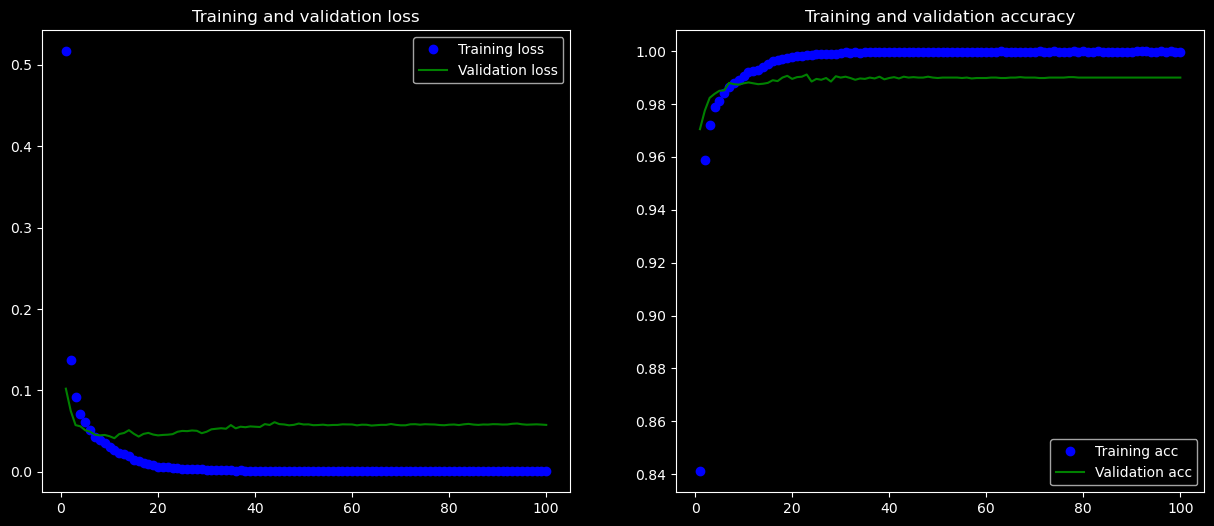

In [8]:
# plot the training history as loss and accuracy curves
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

_, ax = plt.subplots(ncols = 2, figsize = (15, 6))
ax[0].plot(epochs, loss, 'bo', label = 'Training loss')
ax[0].plot(epochs, val_loss, 'g', label = 'Validation loss')
ax[0].set_title('Training and validation loss')
ax[0].legend()

ax[1].plot(epochs, acc, 'bo', label = 'Training acc')
ax[1].plot(epochs, val_acc, 'g', label = 'Validation acc')
ax[1].set_title('Training and validation accuracy')
ax[1].legend();

In [9]:
%load_ext tensorboard
%tensorboard --logdir ./logs  # start tensorboard with ipython magic command

## Evaluation after Training

In [10]:
# Load the parameters with the best validation accuracy during training.
# This works also if you interruped the training!
model.load_weights(model.name + '.keras')
test_loss, test_acc = model.evaluate(x_test, y_test, verbose = 0)
print("Loss on test set:", test_loss, "\nAccuracy on test set:", test_acc)

Loss on test set: 0.03476715832948685 
Accuracy on test set: 0.9884999990463257


In [11]:
# make a prediction
prediction = model.predict(x_test)
prediction_class = prediction.argmax(axis = 1)
prediction_confidence = prediction.max(axis = 1)

print("Predicted probabilities for first 5 examples:\n", np.round(prediction[0:5], 3))
print("Predicted classes for first 5 examples:\n", prediction_class[0:5])
print("Probability of prediction:\n", prediction_confidence[0:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted probabilities for first 5 examples:
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]
Predicted classes for first 5 examples:
 [7 2 1 0 4]
Probability of prediction:
 [0.99998665 1.         0.9999658  0.999997   0.9999925 ]


In [12]:
sklearn.metrics.confusion_matrix(y_test_labels, prediction_class)

array([[ 972,    0,    2,    0,    0,    1,    1,    0,    1,    3],
       [   0, 1131,    1,    0,    0,    0,    0,    3,    0,    0],
       [   2,    2, 1018,    3,    0,    0,    0,    7,    0,    0],
       [   0,    0,    1,  999,    0,    5,    0,    1,    3,    1],
       [   0,    0,    1,    0,  975,    0,    0,    2,    1,    3],
       [   1,    0,    0,    4,    0,  882,    2,    1,    1,    1],
       [   4,    3,    0,    1,    3,    3,  943,    0,    1,    0],
       [   0,    0,    4,    1,    0,    0,    0, 1022,    0,    1],
       [   3,    0,    5,    4,    0,    0,    0,    2,  956,    4],
       [   0,    2,    0,    4,    8,    2,    0,    6,    0,  987]])

In [13]:
print(sklearn.metrics.classification_report(y_test_labels, prediction_class))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



### Display misclassified numbers

In [14]:
indices = np.arange(len(y_test))[y_test_labels != prediction_class]

Expected 3 , got 8 with prob 0.46984679


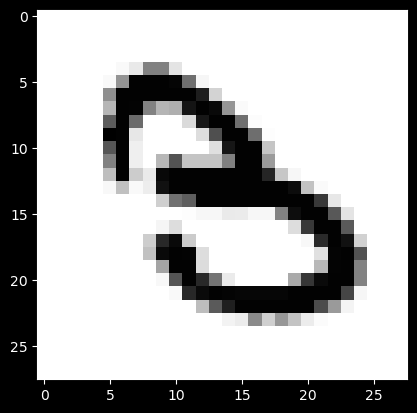

Expected 7 , got 2 with prob 0.6211988


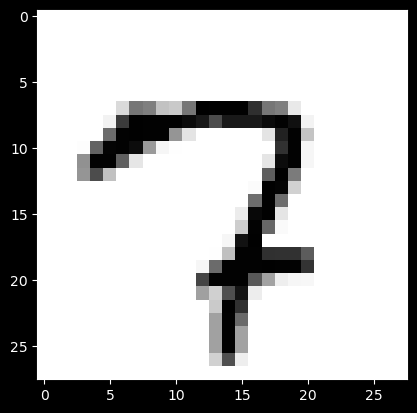

Expected 8 , got 3 with prob 0.75017583


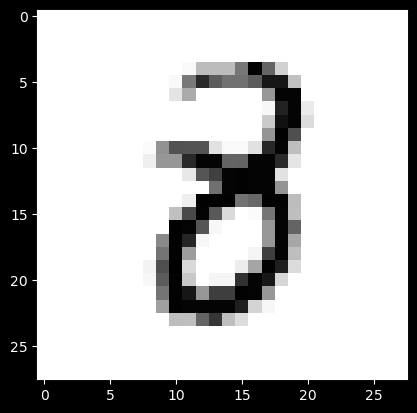

Expected 4 , got 2 with prob 0.9804161


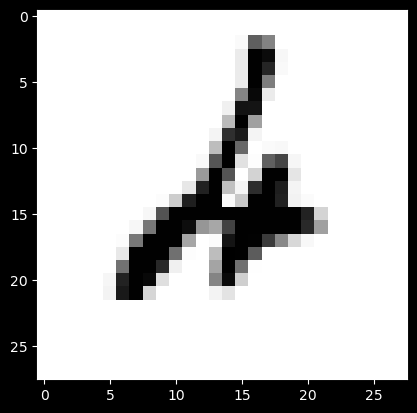

Expected 2 , got 7 with prob 0.92994255


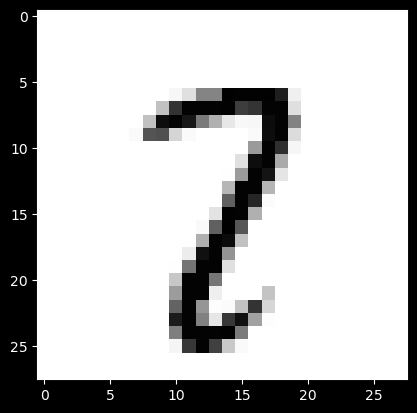

In [15]:
for i in indices[:5]:
    print("Expected", y_test_labels[i], ", got", prediction_class[i], "with prob", prediction_confidence[i])
    # Visualize one sample
    plt.imshow(x_test[i], cmap='Greys')
    plt.show()

## 'Deploy'
We now go 'online' with our newly built model and deploy it to make use of it.

**Usage:**

Run the next cell. A opencv window will pop up. Draw in the canvas with the left mouse button activated. The following commands are available:

**Commands:**
* Esc or q to quit
* r to reset the image
* p to let the neural network predict the target of your image

In [16]:
# No need to understand the code below
import cv2 as cv
drawing = False
ix,iy = None, None
img = np.zeros((img_size, img_size), np.uint8)
radius = 1

# mouse callback function
def draw_circle(event,x,y,flags,param):
    global ix, iy, drawing
    if event == cv.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
    elif event == cv.EVENT_MOUSEMOVE:
        if drawing:
            cv.circle(img, (x, y), radius, 255, -1)
    elif event == cv.EVENT_LBUTTONUP:
        drawing = False
        cv.circle(img, (x, y), radius, 255, -1)

title = 'Please enter your digit between 0 and 9'
print("Confidences\t\t\t\t\t\t\t|   Prediction")  # Table head
print("-" * 64 + '+' + "-" * 15)
np.set_printoptions(formatter={'float': '{: .2f}'.format})
cv.namedWindow(title)
cv.setMouseCallback(title, draw_circle)
while True:
    cv.imshow(title, img)
    key = cv.waitKey(1) & 0xFF
    if key == 112:  # p = predict
        x_img = img.reshape(1, img_size, img_size)
        y_img = model.predict(x_img)
        print("{0}\t|\t{1}".format(y_img[0], y_img.argmax(axis=1)[0]))    
        # print("{0}\t|\t{1}".format(np.around(y_img[0], 2), y_img.argmax(axis=1)[0]))    
    if key in (27, 113):  # Esc or q = quit
        break
    if key == 114:  # r = reset image
        img = np.zeros((img_size, img_size), np.uint8)
cv.destroyAllWindows()

Confidences							|   Prediction
----------------------------------------------------------------+---------------


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in ""


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
[ 0.00  0.01  0.99  0.00  0.00  0.00  0.00  0.00  0.00  0.00]	|	2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
[ 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  1.00]	|	9


## 'Deploy'
We now go 'online' with our newly built model and deploy it to make use of it.

**Usage:**

Run the next cell. A opencv window will pop up. Draw in the canvas with the left mouse button activated. The following commands are available:

**Commands:**
* r to reset the image
* c (calculate) to let the neural network predict the target of your image

14

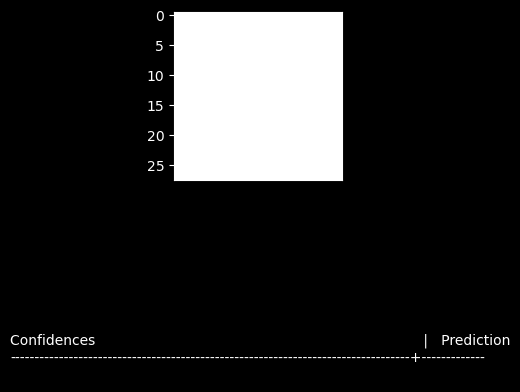

In [17]:
# No need to understand the code below !!!
# %matplotlib notebook
np.set_printoptions(formatter={'float': '{: .2f}'.format})

img = np.zeros((img_size, img_size), np.uint8)



fig = plt.figure()
ax = fig.add_subplot(211)
artist = ax.imshow(img, cmap='Greys')
ax_text = fig.add_subplot(212)
ax_text.axis('off')
header=ax_text.text(0,
                    0.2,
                    "Confidences" + " " * 75 + "|" "   Prediction",
                    va="bottom", ha="left")  # Table head
separator=ax_text.text(0,
                       0.1,
                       "-" * (82) + "+" + "-" * 13,
                       va="bottom", ha="left")  # Table separator

text=ax_text.text(0, 0, "", va="bottom", ha="left")

ax.tick_params(
    axis='both',       # changes apply to both axes
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

drawing = False


def update():
    artist = ax.imshow(img, cmap='Greys')
    artist.set_array(img)
    fig.canvas.draw()
    fig.canvas.flush_events()


def draw(event):
    ix, iy = int(round(event.xdata)), int(round(event.ydata))
    if img[iy, ix] == 0:
        img[iy, ix] = 255
        update()

def pen_down(event):
    global drawing
    drawing = True
    draw(event)
    
def pen_up(event):
    global drawing
    drawing = False

def pen_move(event):
    global drawing
    if drawing:
        draw(event)
        
def keyboard_input(event):
    global img
    if event.key == 'c':
        try:
            x_img = img.reshape(1, img_size, img_size)
            y_img = model.predict(x_img / 255.)
            tx = "{0}  |  {1}".format(y_img[0], y_img.argmax(axis=1)[0])
        except Exception as err:
            tx = str(err)
            
        text.set_text(tx)
    elif event.key == 'r':
        img = np.zeros((img_size, img_size), np.uint8)
        update()

fig.canvas.mpl_connect('button_press_event', pen_down)
fig.canvas.mpl_connect('button_release_event', pen_up)
fig.canvas.mpl_connect('motion_notify_event', pen_move)
fig.canvas.mpl_connect('key_press_event', keyboard_input)

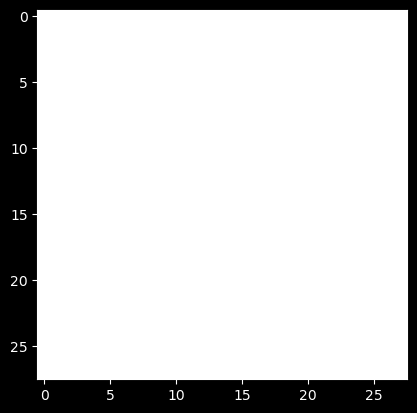

In [18]:
plt.imshow(img, cmap='Greys')
plt.show()

**Exercise**:

2. Experiment with the above 'deployed' neural net. Can you find systematic weeknesses of the NN? Do you experience the same accuracy as measured by the test set? If not, what could be the reasons and possible solutions to more robust classification?

**General remark:**
The requirement for the prediction input of every already trained NN is always that it is sampled from the *same domain* as the data set the NN was trained on. If this is not the case, the NN is *extrapolating* outside its learned domain and can return unexpected results. It is always to keep in mind that the neural network will only be as good as the data you provided it at training time *[2 points]*.

**Approaches to more robust NNs:**
* **Data augmentation** *[1 point]* is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks. **The augmentation operations correspond to the invariant symmetries**.
    * In the case of the mnist data set for example, numbers are translation and scaling invariant but not invariant to flipping. You can see the bias in scaling and translation very easy: Draw a small 1 in a corner of the  data set.
 

* **Input pre-processing** *[1 point]* can be used to modify the input to come closer to the domain of trainig data.
    * In the case of the mnist data set, we have to make sure to use e.g. a similar pen width for drawing the image and or smoothen the pen.
    * Usually for character recognition other algorithms are designed to retrieve stand-alone digits from series of characters. Only then they are fed to the characterization network in the correct format.

## Explanation
Given the last exercise we developed some intuition which are some of the weaknesses of a NN. Now we would like to finish by trying to address this issue more systematically and better understand what the network has learned during training.

A NN is usually refered to be a black-box, but nowadays there are actually tools which try to overcome this limitation and give insights on the learned feature. Today we will use [SHAP (SHapley Additive exPlanations)](https://github.com/slundberg/shap), which is a game theory approach to explain the output of any machine learning model (here the [paper](http://papers.nips.cc/paper/7062-a-unified-approach-to-interpreting-model-predictions)).

**Usage:**

Run the next cell. It will instantiate a `DeepExplainer` object which, given the trained model, a set of reference input values and some given test samples, will produces the so-called `shape_values`. The `image_plot` function provides a handy visualization for them.

On the rows we have our test images, while each column represent an output class. The `DeepExplainer` object assigns a single value (aka the shap value) to each input pixel, where that value represents the relationship between the input pixel and the output class probability prediction. Red pixels represent positive SHAP values that increase the probability of the class, while blue pixels represent negative SHAP values which reduce the probability of the class. In other words we could interpret these values as representations of which pixels make a zero a `0`, and which do not.

**Exercise**:

Given these new insights, could you come up with *smarter* attacks? Use the same canvas above.

In [19]:
import shap

# Scaling images is required for shap
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# this is a hack
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

# select a set of background examples to take an expectation over
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]

# explain predictions of the model on four images
explainer = shap.DeepExplainer(model, background)
shap_values = explainer.shap_values(x_test[1:5], check_additivity=False)

# plot the feature attributions
shap.image_plot(shap_values, -x_test[1:5])

ModuleNotFoundError: No module named 'shap'

**General remarks:**

Look at the last row and see how the top pixels in the four are red for the `4` class, while they are blue for the `9` class.

**Exploitation:**

We could exploit these weakness even further and aim for a single pixel attack, here you could find a famous [paper](https://arxiv.org/pdf/1710.08864.pdf) on the topic.